<a href="https://colab.research.google.com/github/0DianaHernandez/Simulacion-I/blob/main/Intrgracion_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Método de Monte Carlo Media Muestral**


Si deseamos calcular la integral $I = \int_{a}^{b} g(x) \, dx$
para alguna función $g(x)$ difícil de integrar analíticamente, podemos hacer la siguiente sustitución:

$$I = \int_{a}^{b} g(x) \, dx = \int_{a}^{b} w (x) g(x) \, dx$$

Con
* $w(x) = g(x)(b-a)$
* $ f(x) = \frac{1}{b-a} $

Por tanto, la integral transformada puede interpretarse como un múltiplo del valor esperado de $g(x)$ bajo la distribución uniforme:
$$ E[g(X)]= \frac{I}{b - a} $$

Con  $X \sim \text{U}(a, b)$

Si tomamos una muestra de números pseudoaleatorios uniformemente distribuidos, digamos $X_1, ..., X_N \sim U(a,b)$, por la ley de los grandes números para $N$ suficientemente grande tendremos que, con probabilidad
$1$:
$$ \frac{1}{N} \sum_{i=1}^{N} g(X_i) \rightarrow E[g(X)] = \frac{1}{b - a} $$



*Estimación de:* $$ \int_{0}^{1} \sqrt{\arctan(x)} \, dx $$


In [13]:
import random
import numpy as np
import matplotlib.pyplot as plt

La aproximación numérica se obtiene de la siguiente expresión:
$$I =\frac 1n [{g(x_1) + ... + g(x_n)}]$$

Donde:

* $g(x) = \sqrt{\arctan(x)} $  

* $x_i \sim U(0, 1)$

In [95]:
#definimos la función g(x)=f(x)
def g_x(x):
  g_i=np.sqrt(np.arctan(x))
  return g_i


Los valores de la variable representan puntos igualmente
espaciados en el intervalo de integración $(0,1)$ mientras que en el segundo caso los valores de la variable consisten en una muestra de números pseudoaleatorios uniformes para el mismo intervalo,entonces:

$$I = (b - a)E[g(X)]$$

Y un estimador insesgado para la integral es:
$$ I = (b-a) \frac{1}{n} \sum_{i=1}^{n} g(X_i) $$

con $X_i \sim U(0,1)$

In [111]:
#Generamos n variables x distribuidas uniformemente de 0 a 1
def Estimacion(N,a,b):
  U=np.random.uniform(0, 1, N)
  Xi=a+U*(b-a)
  g=g_x(Xi)
  I=(b-a)/N*np.sum(g)          #Aproximación

  return I

In [121]:
#Comprobamos el número N donde empieza una convergencia
N=1000 #Muestra inicial
a=0 #Límite inferior de la integral
b=1 #Límite superior de la integral
suma=[]
Lista=[]
for i in range (N):
   Lista.append(Estimacion(N,a,b))
   P = (1 / (i + 1)) * sum(Lista) #Probabilidades de la estimación
   suma.append(P)


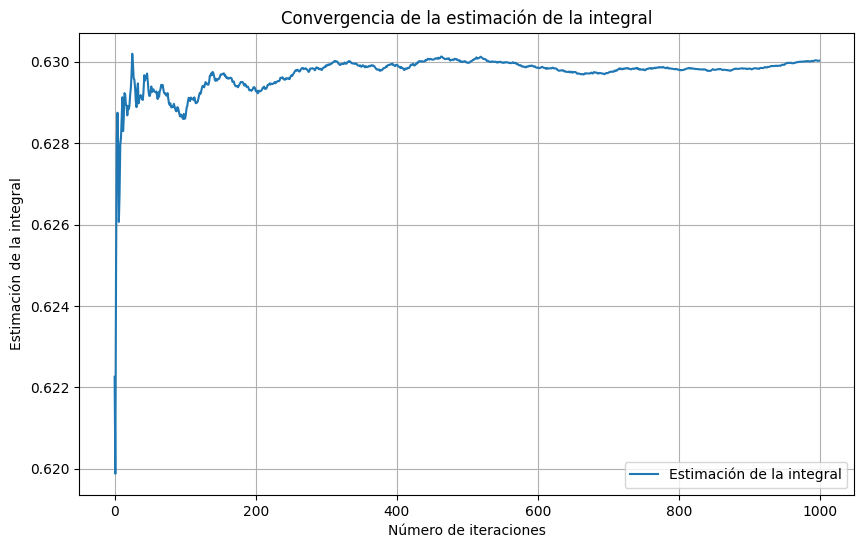

Valor estimado de la integral: 0.6299860627789399


In [122]:
# Graficar la convergencia de la estimación de la integral
plt.figure(figsize=(10, 6))
plt.plot(suma, label='Estimación de la integral')
plt.xlabel('Número de iteraciones')
plt.ylabel('Estimación de la integral')
plt.title('Convergencia de la estimación de la integral')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir el valor estimado final de la integral
print("Valor estimado de la integral:", I)


*Iniciamos la Simulación para un N=500 que es donde observamos que empieza una convergencia buena*

In [129]:
def histograma(aprox):                                  #Esta función imprime la estimación y el histograma
  plt.hist(aprox, bins=25, color='purple', alpha=0.7)
  plt.axvline(np.mean(aprox),label='Media',color="green")
  plt.xlabel('Valor de la integral')
  plt.ylabel('Frecuencia')
  plt.legend()
  print('Estimación (Media): ', np.mean(aprox))
  return

Estimación (Media):  0.6297173204177492


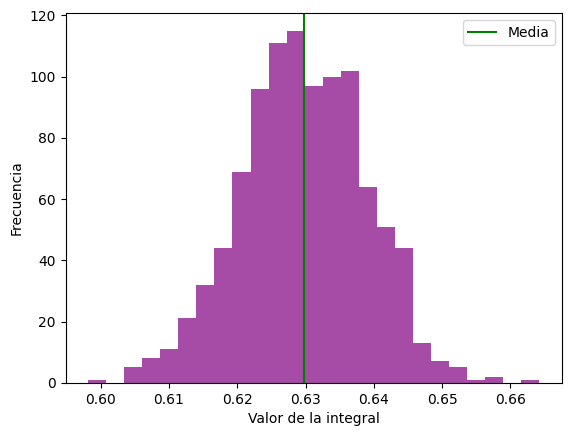

In [130]:
#Parametros
m=1000        #Número de iteraciones
n=500         #Tamaño de la experimentos
a=0
b=1

aprox=[]
for i in range(m):
  aprox.append(Estimacion(n,a,b))

histograma(aprox)

**Intervalo de confianza:Teorema de Chebyshev**
El teorema de Chebyshev establece que para cualquier distribución de datos con media $μ$ y varianza $σ^2$, al menos $1- \frac 1{k^2}$ de los datos estarán dentro de $k$ desviaciones estándar de la media, donde $k$ es un número positivo mayor que 1.

$$Intervalo de confianza=[μ−2σ,μ+2σ]$$

Significa que podemos estar razonablemente seguros de que el verdadero valor de la integral está dentro de este rango, con una confianza del
75%


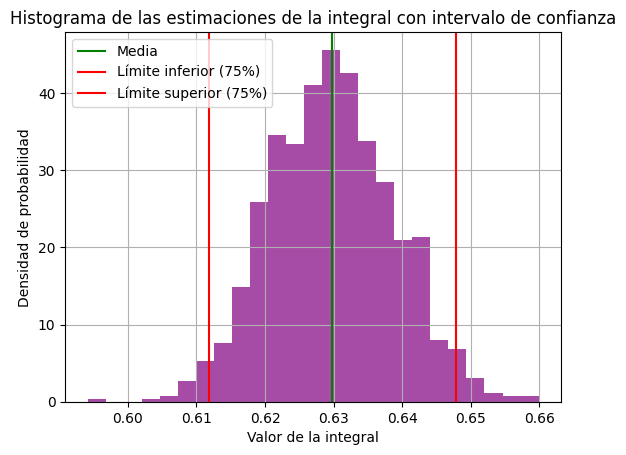

Estimación (Media):  0.6297766504066479
Intervalo de confianza del 75%: [0.6117726246252939, 0.6477806761880018]


In [136]:
# Función para calcular el histograma con intervalo de confianza

def histograma_con_intervalo(aprox):
    # Calcular la media y la desviación estándar de las aproximaciones
    mu = np.mean(aprox)
    sigma = np.std(aprox)

    # Calcular el intervalo de confianza del 75% utilizando el teorema de Chebyshev
    k = 2  # Escogemos k=2 para un intervalo de confianza del 75% (1 - 1/k^2)
    lower_bound = mu - k * sigma
    upper_bound = mu + k * sigma

    # Graficar el histograma de las aproximaciones con intervalo de confianza
    plt.hist(aprox, bins=25, color='purple', alpha=0.7, density=True)

    # Líneas para la media y los límites del intervalo de confianza
    plt.axvline(mu, label='Media', color="green")
    plt.axvline(lower_bound,color='red', label='Límite inferior (75%)')
    plt.axvline(upper_bound,color='red', label='Límite superior (75%)')

    plt.xlabel('Valor de la integral')
    plt.ylabel('Densidad de probabilidad')
    plt.title('Histograma de las estimaciones de la integral con intervalo de confianza')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Imprimir resultados
    print('Estimación (Media): ', mu)
    print(f'Intervalo de confianza del 75%: [{lower_bound}, {upper_bound}]')
    return

# Generar las aproximaciones de la integral
aproximaciones = [Estimacion(n, a, b) for _ in range(m)]

# Llamar a la función para graficar el histograma con intervalo de confianza
histograma_con_intervalo(aproximaciones)